# Pratica Guiada - Visualização.

#### A visualização é um recurso **útil e/ou necessário** para a **análise exploratória** dos dados e a **apresentação de resultados**. Veremos uma série de gráficos que *resumem informações estatísticas* de uma determinada base de dados  (amostra, população, etc.), tais como:

1. Histogramas 
2. Box plots
3. Violin plots
4. De dispersão (scatterplots)
5. De linhas (plots)
6. De barras (bar, barh)
7. Painéis combinados
8. Matrizes de correlação

#### Os painéis combinados podem incluir informação sobre uma mesma variável ou mostrar a *relação entre duas (ou mais) variáveis* de uma base de dados. Nestes casos, recorremos aos jointplots ou aos pairplots.

#### Lembrem-se que sempre temos que importar as bibliotecas e carregar os dados.

#### Há diversas bibliotecas para implementar visualizações, muitas são baseadas em `matplotlib`. Aqui veremos as seguintes:
* [Matplotlib](https://matplotlib.org/1.2.1/index.html).
* [Seaborn](https://seaborn.pydata.org/).

## Primeiros passos.

#### Antes de começar a estudar um caso real vejamos um dataset sintético, ou seja, um conjunto de informações criado artificialmente. 

#### Isto é geralmente usado para entender o comportamento de uma certa distribuição estatística, neste caso, veremos como uma amostra tirada de uma população com distribuição normal se comporta.

#### Para isso, é comum usar **histogramas**, que são utilizados para observar a função de densidade, ou seja, a distribuição de frequência dos valores de uma variável de interesse.

#### Importamos as funcionalidades necessárias e geraramos uma distribuição normalmente distribuída, com os parâmetros de média e desvio definidos.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

média = 250
desvio = 50
x = np.random.normal(média, desvio, 10000)

#### Vamos plotar o respectivo histograma [plt.hist()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) usando a função [matplotlib.pyplot.figure](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure). 

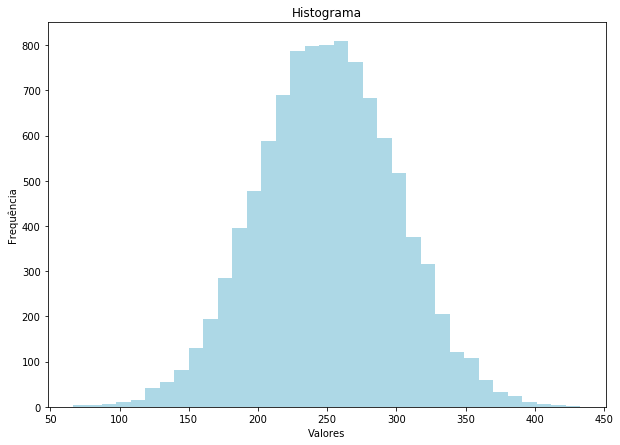

In [32]:
plt.figure(figsize = (10,7.07))
plt.hist(x, bins = 35, color = 'lightblue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()

#### Analisando a inflação.

#### Agora vamos analisar um problema real. Vamos supor que nos peçam para estudar a evolução da inflação desde 2016. Para isso podemos encontrar informação aberta em 

##### Na Argentina, o INDEC é o responsável por publicar a informação oficial sobre a evolução do índice de preços ao consumidor (IPC). Este [índice](https://datos.gob.ar/vi/dataset/sspm-ipc-nacional-tasas-variacion-mensual-por-categorias-base-dic-2016/archivo/sspm_173.1?view_id=aed0431a-0a48-442e-861c-d19f17119993) tenta refletir a evolução geral dos preços que afetam o consumidor típico, ao contrário de outros índices de preços, como, por exemplo, o índice de preços da construção, que se concentra na evolução dos preços dos materiais de construção.

#### O INDEC divide o IPC em três tipos de componentes: 

- Bens e serviços com comportamento sazonal: frutas, legumes, vestuário, transporte por turismo e alojamento e excursões

- Bens e serviços cujos preços estão sujeitos a regulamentação ou têm um componente fiscal elevado: combustível para habitação, eletricidade, água e serviços sanitários, sistemas de saúde e serviços auxiliares, transporte público de passageiros, funcionamento e manutenção de veículos, correio, telefone, educação formal e cigarros e acessórios.

- Bens e serviços restantes (componente núcleo): segundo o INDEC "um dos objetivos ao calcular uma medida de núcleo da inflação é poder contar com um indicador que permita analisar a evolução dos preços da economia sem levar em conta aquelas flutuações de natureza temporária, sazonal ou que sejam revertidas em curto prazo. "

#### Você pode se aprofundar no assunto vendo o documento [metodológico N° 17](https://www.indec.gob.ar/ftp/cuadros/economia/ipc_metodologia_17_07_16.pdf).


#### Primeiro, vamos carregar os dados com pandas e analisar a série de IPC que contém informação de dez 2016 até jan 2020.

In [33]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('ipc-categorias-tasas-variacion-mensual-distribucion-mensual-base-dic-2016.csv')

#### Vejamos as variáveis que os dados contêm.

In [34]:
#data.head()
#data.tail()
data

,indice_tiempo,estacionales,ipc_nucleo,ipc_regulados
0,2016-12-01,NaN,NaN,NaN
1,2017-01-01,0.016969,0.015039,0.018183
2,2017-02-01,0.006270,0.016813,0.040398
3,2017-03-01,0.023964,0.019331,0.038460
4,2017-04-01,0.032446,0.021114,0.040536
5,2017-05-01,0.008013,0.016568,0.010405
6,2017-06-01,0.009383,0.013354,0.008920
7,2017-07-01,0.004652,0.017648,0.022918
8,2017-08-01,0.010723,0.014320,0.014855
9,2017-09-01,0.039715,0.016342,0.017179


#### Vamos obter uma descrição do dataframe.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indice_tiempo  40 non-null     object 
 1   estacionales   39 non-null     float64
 2   ipc_nucleo     39 non-null     float64
 3   ipc_regulados  39 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


#### Convertendo a variável 'indice_tiempo' para typo datetime com a função [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [36]:
data['indice_tiempo'] = pd.to_datetime(data['indice_tiempo'], 
                                       format = '%Y-%m-%d', 
                                       errors = 'ignore'
                                      )

In [37]:
data

,indice_tiempo,estacionales,ipc_nucleo,ipc_regulados
0,2016-12-01,NaN,NaN,NaN
1,2017-01-01,0.016969,0.015039,0.018183
2,2017-02-01,0.006270,0.016813,0.040398
3,2017-03-01,0.023964,0.019331,0.038460
4,2017-04-01,0.032446,0.021114,0.040536
5,2017-05-01,0.008013,0.016568,0.010405
6,2017-06-01,0.009383,0.013354,0.008920
7,2017-07-01,0.004652,0.017648,0.022918
8,2017-08-01,0.010723,0.014320,0.014855
9,2017-09-01,0.039715,0.016342,0.017179


## Boxplot I.

#### Aqui podemos criar variados gráficos de caixa com a função [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot) e dispô-los em uma única figura, de acordo com as definições da função [`plt.pyplot.subplot()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib-pyplot-subplot).

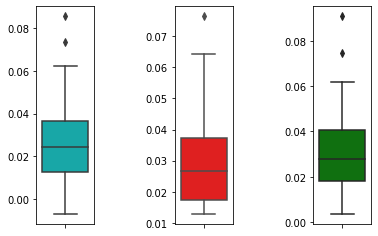

In [38]:
plt.subplot(1, 5, 1)
sns.boxplot(x = ['estacionales'], 
            data = data, 
            orient = 'v', 
            color = 'c'
           )

plt.subplot(1,5,3)
sns.boxplot(x = ['ipc_nucleo'], 
            data = data, 
            orient = 'v', 
            color = 'r'
           )

plt.subplot(1, 5, 5)
sns.boxplot(x = ['ipc_regulados'], 
            data = data, orient = 'v', 
            color = 'g'
           )

plt.show()

#### Criamos o nosso primeiro boxplot. No entanto, vemos que obtivemos três gráficos que, na mesma escala, representam três intervalos diferentes de valores. Para acomodar isso, vamos reorganizar o conjunto de dados em um formato mais "limpo".

In [39]:
data.head(20)

,indice_tiempo,estacionales,ipc_nucleo,ipc_regulados
0,2016-12-01,NaN,NaN,NaN
1,2017-01-01,0.016969,0.015039,0.018183
2,2017-02-01,0.006270,0.016813,0.040398
3,2017-03-01,0.023964,0.019331,0.038460
4,2017-04-01,0.032446,0.021114,0.040536
5,2017-05-01,0.008013,0.016568,0.010405
6,2017-06-01,0.009383,0.013354,0.008920
7,2017-07-01,0.004652,0.017648,0.022918
8,2017-08-01,0.010723,0.014320,0.014855
9,2017-09-01,0.039715,0.016342,0.017179


#### Passamos o dataset de um formato "largo" a um formato "longo" com a função [`pandas.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas-melt).

In [40]:
formatted_df = pd.melt(data, 
                       id_vars = ["indice_tiempo"], 
                       var_name = "tipo_inflação", 
                       value_name = "inf"
                      )
formatted_df

,indice_tiempo,tipo_inflação,inf
0,2016-12-01,estacionales,NaN
1,2017-01-01,estacionales,0.016969
2,2017-02-01,estacionales,0.006270
3,2017-03-01,estacionales,0.023964
4,2017-04-01,estacionales,0.032446
...,...,...,...
115,2019-11-01,ipc_regulados,0.038172
116,2019-12-01,ipc_regulados,0.046058
117,2020-01-01,ipc_regulados,0.011331
118,2020-02-01,ipc_regulados,0.007026


#### Convertemos `indice_tempo` em datetime.

In [41]:
formatted_df['indice_tiempo'] = pd.to_datetime(formatted_df['indice_tiempo'], 
                                               format = '%Y-%m-%d', 
                                               errors = 'ignore'
                                              )

#### Vamos analisar a tabela novamente.

In [42]:
formatted_df.head(20)
#formatted_df.tail(20)

,indice_tiempo,tipo_inflação,inf
0,2016-12-01,estacionales,NaN
1,2017-01-01,estacionales,0.016969
2,2017-02-01,estacionales,0.006270
3,2017-03-01,estacionales,0.023964
4,2017-04-01,estacionales,0.032446
5,2017-05-01,estacionales,0.008013
6,2017-06-01,estacionales,0.009383
7,2017-07-01,estacionales,0.004652
8,2017-08-01,estacionales,0.010723
9,2017-09-01,estacionales,0.039715


In [43]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   indice_tiempo  120 non-null    datetime64[ns]
 1   tipo_inflação  120 non-null    object        
 2   inf            117 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.9+ KB


## Boxplot II.

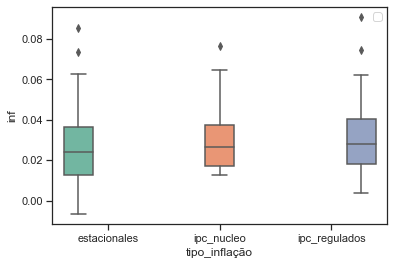

In [44]:
sns.set(style = "ticks")
sns.boxplot(x = 'tipo_inflação', 
            y = 'inf', 
            hue = 'tipo_inflação', orient = 'v', data = formatted_df, palette = 'Set2')
legend = []
plt.legend(legend)
plt.show()

* Que análise podemos fazer do gráfico anterior? 

* É fácil observar qual tipo de inflação tem a maior variabilidade? 

* Por que acham que é dessa forma? 

* E qual é menos volátil? 

* É fácil ver se as distribuições são assimétricas ou simétricas?

## Violin plot.

#### Como substituto para os histogramas, podemos usar a função [`seaborn.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn-violinplot) para identificar a forma da distribuição, plotando a informação interquartílica contida nos box plots.

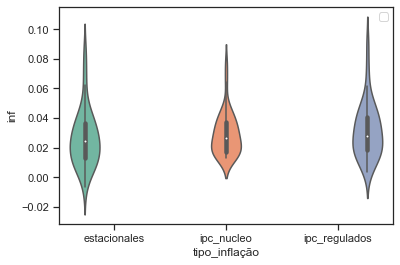

In [45]:
sns.violinplot(x = 'tipo_inflação', 
               y = 'inf', 
               hue = 'tipo_inflação', 
               orient = 'v', 
               data = formatted_df, 
               palette = 'Set2'
              )
legend = []
plt.legend(legend)
plt.show()

## Painel 1-A: Boxplot + histograma.

#### Antes de fazer um histograma vamos começar gerando colunas para cada tipo de inflação e, depois, limpando os arrays de `NaN`.

In [46]:
formatted_df
inflação = formatted_df['inf']
inflação
#sazonais = formatted_df[formatted_df['tipo_inflação'] == 'sazonais']
#sazonais

0           NaN
1      0.016969
2      0.006270
3      0.023964
4      0.032446
         ...   
115    0.038172
116    0.046058
117    0.011331
118    0.007026
119    0.032803
Name: inf, Length: 120, dtype: float64

#### Ficando apenas com a informação correspondente.

In [47]:
inflação = formatted_df['inf']

sazonais = inflação[formatted_df['tipo_inflação'] == 'estacionales']

regulados = inflação[formatted_df['tipo_inflação'] == 'ipc_regulados']

núcleo = inflação[formatted_df['tipo_inflação'] == 'ipc_nucleo']

#### Vamos tomar apenas os valores não `Nan` do dataframe `inflação`. 

In [48]:
sazonais = sazonais[~np.isnan(sazonais)]

regulados = regulados[~np.isnan(regulados)]

núcleo = núcleo[~np.isnan(núcleo)]

#### Perbeca que tomamos o [subconjunto complementar](https://www.tutorialspoint.com/What-is-tilde-operator-in-Python) do subconjunto dos elementos `NaN`  no datafram "inflação".

#### Agora podemos importar a biblioteca [`matplotlib.pyplot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html), definir as características gerais do próximo gráfico, definir a forma do painel e posição do subplot,  aplicar a função de plot de distribuições [`seaborn.distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn-distplot) e mostramos o gráfico.

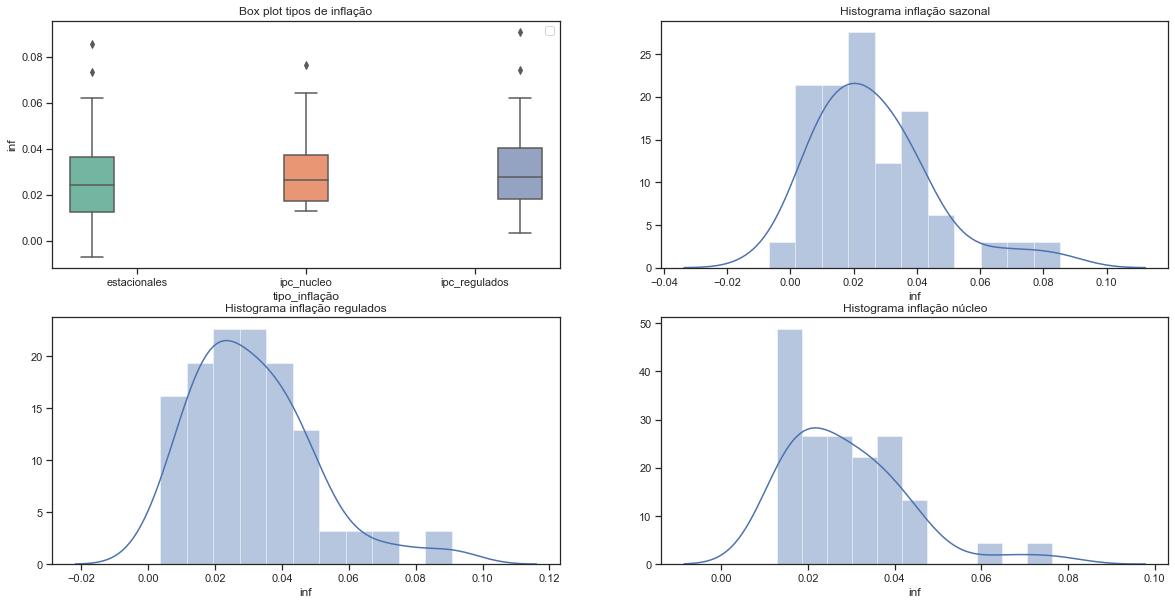

In [49]:
import matplotlib.pyplot 

plt.figure(figsize = (20,10))

# Subplot
plt.subplot(2, 2, 1)
plt.gca().set_title('Box plot tipos de inflação')
sns.boxplot(x = 'tipo_inflação', 
            y = 'inf', 
            hue = 'tipo_inflação', 
            orient = 'v', 
            data = formatted_df, 
            palette = 'Set2'
           )

legend = []
plt.legend(legend)

# Subplot
plt.subplot(2, 2, 2)
plt.gca().set_title('Histograma inflação sazonal')
sns.distplot(sazonais, 
             bins = 11
            )

# Outro subplot
plt.subplot(2, 2, 3)
plt.gca().set_title('Histograma inflação regulados')
sns.distplot(regulados, 
             bins = 11
            )

# Outro subplot
plt.subplot(2, 2, 4)
plt.gca().set_title('Histograma inflação núcleo')
sns.distplot(núcleo, 
             bins = 11
            )

plt.show()

#### A inflação é distribuída de forma normal? É útil inferir a distribuição com a quantidade de observações que temos?

### Painel 1-B: Boxplot + histograma.

#### Como há poucos pontos de amostragem, seria mais sensato omitir o gráfico de distribuição e apenas representar graficamente o histograma. 

#### Refazemos então o gráfico anterior, omitindo a distribuição estimada.

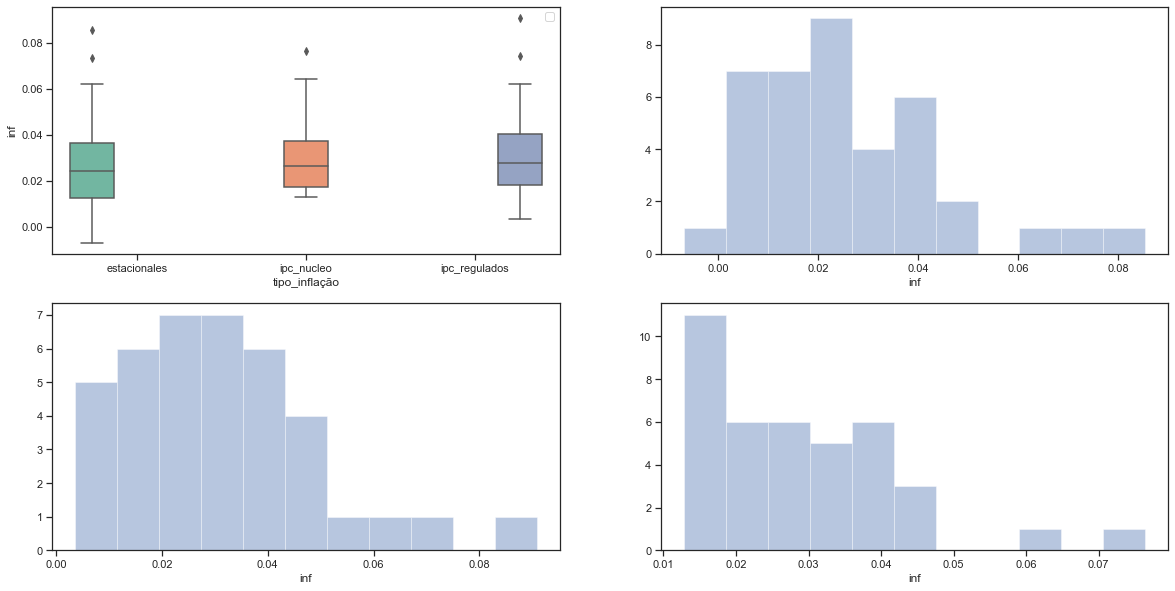

In [50]:
plt.figure(figsize = (20,10))

# Forma da grade e posição do subplot
plt.subplot(2,2,1)
sns.boxplot(x = 'tipo_inflação', 
            y = 'inf', hue = 'tipo_inflação', orient = 'v',data = formatted_df, palette = 'Set2')
#legend = []
plt.legend(legend)

# Subplot
plt.subplot(2,2,2)
sns.distplot(sazonais, bins = 11, kde = False)

# Subplot
plt.subplot(2,2,3)
sns.distplot(regulados, bins = 11, kde = False)

# Subplot
plt.subplot(2,2,4)
sns.distplot(núcleo, bins = 11, kde = False)

plt.show()

### Painel 2: conjunto de gráficos 

#### Agora vamos adicionar mais gráficos para tentar entender melhor o que nosso conjunto de informações diz.

In [51]:
formatted_df.head()

,indice_tiempo,tipo_inflação,inf
0,2016-12-01,estacionales,NaN
1,2017-01-01,estacionales,0.016969
2,2017-02-01,estacionales,0.006270
3,2017-03-01,estacionales,0.023964
4,2017-04-01,estacionales,0.032446


#### Geramos o ambiente da figura, dividimos a área em áreas de 3 filas x 1 coluna (grades) (a forma das grades é análoga à dos arranjos) para gerar vistas diferentes dos dados.

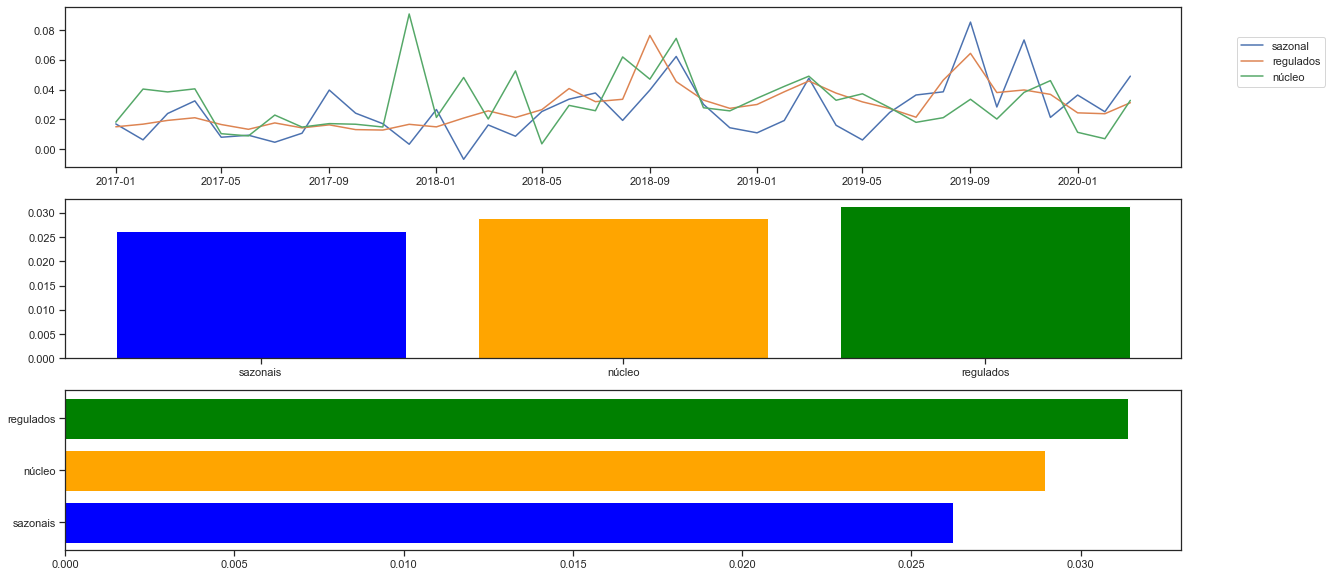

In [52]:
plt.figure(figsize=(20, 10))

#plt.subplot(2, 2, 1) # selecionamos o #2
plt.subplot(3, 1, 1) # selecionamos o #2

# Bloco superior.
pivoted = pd.pivot_table(formatted_df, 
                         values = 'inf', 
                         columns = 'tipo_inflação', 
                         index = 'indice_tiempo'
                        )
plt.plot(pivoted)
plt.legend(('sazonal', 'regulados', 'núcleo' ), 
           loc = (1.05, 0.5)
          ) 

#plt.subplot(2, 2, 2) # selecionamos o #2
plt.subplot(3, 1, 2) # selecionamos o #2


# gráfico de barras verticais.
tipos_inflação = ["sazonais", "núcleo", "regulados"]
valores_média = [sazonais.mean(), núcleo.mean(), regulados.mean()]
inflação_posição = [1, 2, 3]
plt.bar(inflação_posição, 
        valores_média, 
        tick_label = tipos_inflação, 
        color = ('Blue', 'orange', 'green')
       ) 


# gráfico de barras horizontais.
#plt.subplot(2, 2, 3) # selecionamos o #3
plt.subplot(3, 1, 3) # selecionamos o #3
plt.barh(inflação_posição, valores_média, tick_label = tipos_inflação, color = ('Blue', 'orange', 'green'))

plt.show()

#### Que informações esses gráficos adicionam à nossa análise? 

### Scatter plots e correlation plots.

#### Geramos novas variáveis com o objetivo de representá-las graficamente com um scatter plot e, depois, calcular tipos de associação linear.

#### Definimos o tamanho da figura e a distribuição dos subplots.

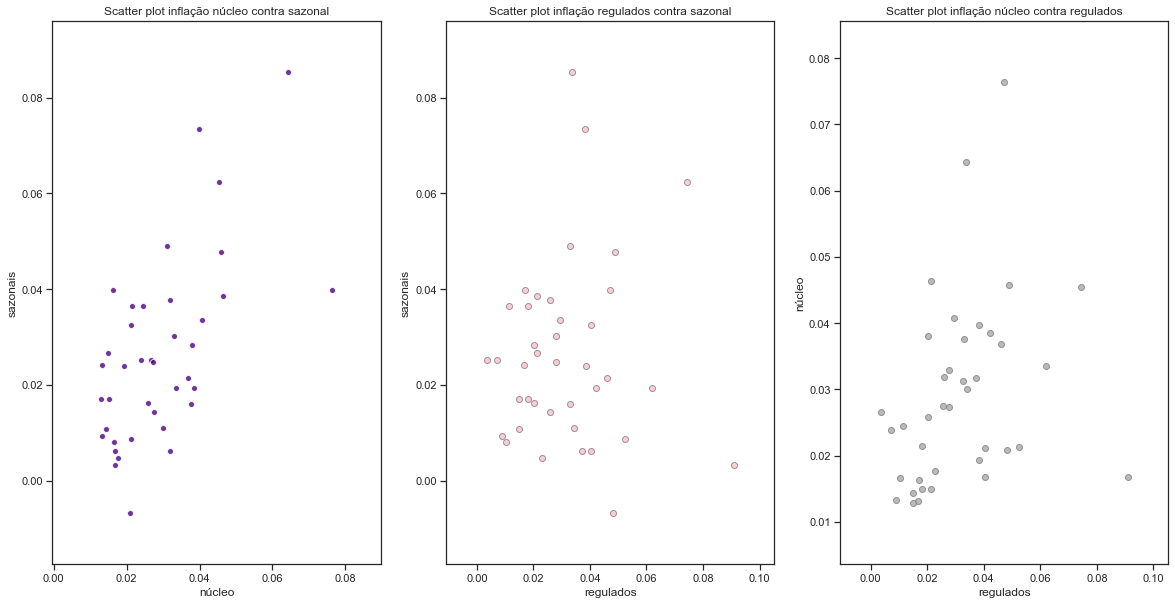

In [53]:
 #plt.figure(figsize = (15,15))
plt.figure(figsize = (20,10))

#plt.subplot(2, 2, 1)
plt.subplot(1, 3, 1)
plt.gca().set_title('Scatter plot inflação núcleo contra sazonal')
plt.scatter(núcleo, sazonais, 
            color = 'indigo', 
            alpha = 0.8, 
            edgecolors = 'white'
           )

plt.xlabel('núcleo')
plt.ylabel('sazonais')

#plt.subplot(2, 2, 2)
plt.subplot(1, 3, 2)
plt.gca().set_title('Scatter plot inflação regulados contra sazonal')
plt.scatter(regulados, 
            sazonais, 
            color = 'pink', 
            alpha = 0.8, 
            edgecolors = 'grey'
           )

plt.xlabel('regulados')
plt.ylabel('sazonais')

#plt.subplot(2, 2, 3)
plt.subplot(1, 3, 3)
plt.gca().set_title('Scatter plot inflação núcleo contra regulados')
plt.scatter(regulados, 
            núcleo, 
            color = 'darkgrey', 
            alpha = 0.8, 
            edgecolors = 'grey'
           )
plt.xlabel('regulados')
plt.ylabel('núcleo')

plt.show()

* Que tipo de relação você observa entre as variáveis do primeiro subplot? Você pode falar sobre associação ou correlação linear? 
* E no segundo subplot?

#### Podemos calcular a covariância [np.cov()](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) dessas variáveis. Como você interpretaria os coeficientes de correlação? O que eles indicam?

In [54]:
np.cov(núcleo, 
       sazonais
      )

array([[0.00019705, 0.00016445],
       [0.00016445, 0.00036564]])

In [55]:
np.cov(regulados, 
       sazonais
      )

array([[3.39447464e-04, 1.64004165e-05],
       [1.64004165e-05, 3.65636857e-04]])

In [56]:
np.cov(regulados, 
       núcleo
      )

array([[3.39447464e-04, 8.06594671e-05],
       [8.06594671e-05, 1.97053345e-04]])

### Calculamos também as matrizes de correlação, usando a função [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn-heatmap).

#### Correlação entre inflações Núcleo e Sazonais.

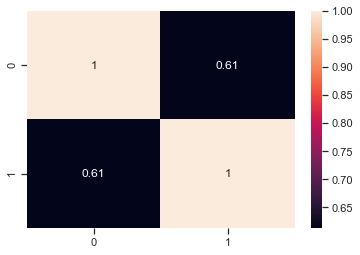

In [57]:
corr1 = np.corrcoef(núcleo, sazonais)
#print(corr1)

sns.heatmap(corr1, 
            annot = True
           );
plt.show()

#### Correlação entre inflações Regulados e Sazonais.

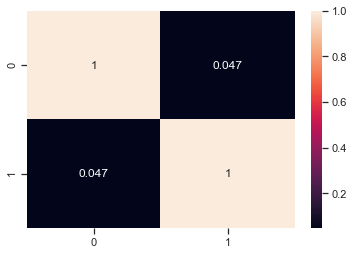

In [58]:
corr2 = np.corrcoef(regulados, 
                    sazonais
                   )
#print(corr2)

sns.heatmap(corr2, annot = True);
plt.show()

#### Correlação entre inflações Regulados e Núcleo.

[[1.         0.31187256]
 [0.31187256 1.        ]]


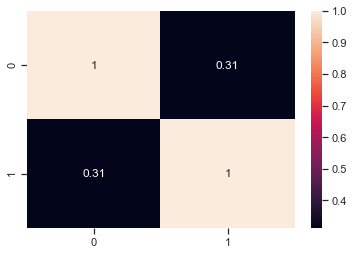

In [59]:
corr3 = np.corrcoef(regulados, 
                    núcleo
                   )
print(corr3)

sns.heatmap(corr3, 
            annot = True
           );
plt.show()

#### Qual é o caso com maior correlação? Por quê?